<h1>Chapter 4: Training Models</h1>
<h2>4.1 Introduction</h2>
<p>Here, we will look at the linear regression model, and discuss two different ways to train it:</p>
<ul>
    <li>Using a closed-form equation that directly computes the model parameters that best fit the model to the training set
         (i.e. the model parameters that minimise the cost function over the training set). </li>
    <li>Using an iterative optimisation approach called Gradient Descent (GD) that gradually tweaks the parameters to minimise the cost function over the training set, eventually converging to the same set of parameters as the first method. 
</ul>

<h2>4.2 Linear Regression</h2>
<p>Recall that training a model means settings its parameters so that the model best fits the training data. Previously, we seen that the most common performance measure for a regression model is the RMSE. Therefore, to train a linear regression model, we need to find a value for the model parameter theta that minimises the RMSE. </p>

<h3>4.2.1 The Normal Equation</h3>
<p>To find the value of theta theta that minimises the MSE, there exists a closed-form solution. This is called the <em>Normal equation</em>.</p>

In [1]:
import numpy as np

np.random.seed(42)

m = 100
X = 2 * np.random.rand(m, 1)
y = 4 + 3*X + np.random.randn(m, 1)

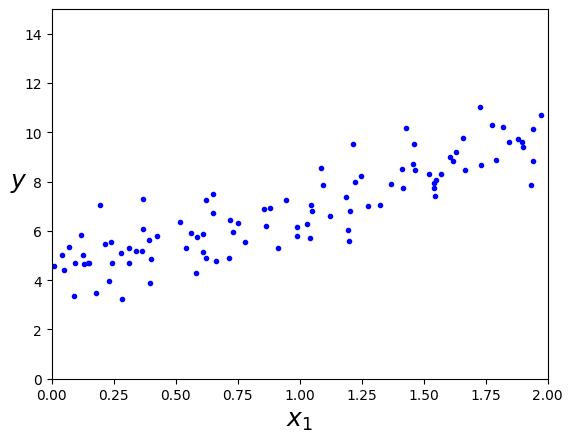

In [2]:
import matplotlib.pyplot as plt

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

In [3]:
from sklearn.preprocessing import add_dummy_feature
X_b = add_dummy_feature(X) # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
theta_best

array([[4.21509616],
       [2.77011339]])

In [4]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.21509616],
       [9.75532293]])

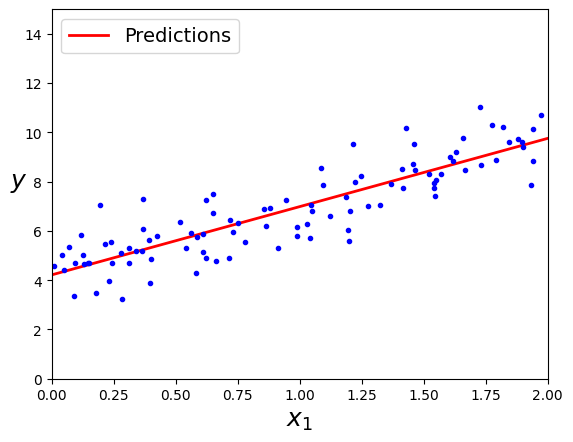

In [5]:
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
plt.show()

<h3>4.2.2 Linear Regression using Scikit-Learn</h3>

In [6]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(X, y)

lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [7]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

<h2>4.3 Gradient Descent</h3>
<p><em>Gradient Descent</em> is a generic optimisation algorithm capable of finding optimal solutions to a wide range of problems. The general idea of GD is to tweak parameters iteratively in order to minimise a cost function. </p>

<p>In practice, you start by filling theta with random values (this is called <em>random initialisation</em>). Then you improve it gradually, taking one baby step at a time, each step attempting to decrease the cost function (e.g. the MSE), until the algorithm converges to a minimum. </p>

<p>An important parameter in gradient descent is the size of the steps, determined by the <em>learning rate</em> hyperparameter. If this is too small, then the algorithm will have to go through many iterations to converge. If it is too high, then you might jump across the valley and miss the minimum. </p>

<h3>4.3.1 Batch Gradient Descent</h3>
<p>To implement GD, you have to compute the gradient of the cost function wrt each model parameter, which is a partial derivative. Instead of doing this individually, we just use the gradient. </p>

In [8]:
eta = 0.1  # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)  # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

theta

array([[4.21509616],
       [2.77011339]])

<p>This is what the Normal Equation found. But, what if we used a different learning rate? </p>

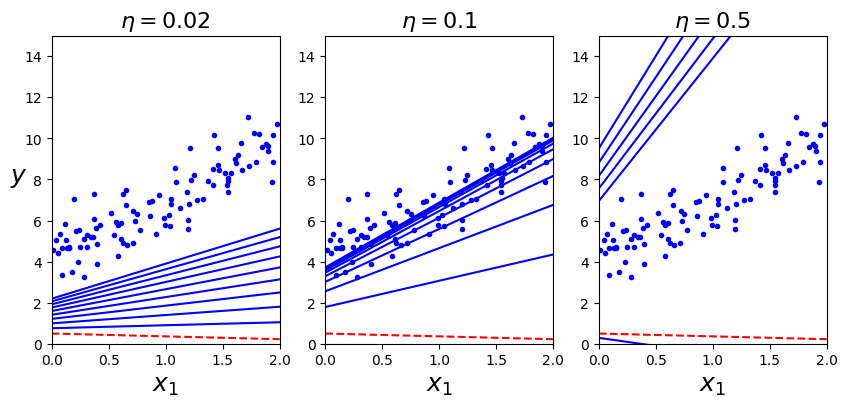

In [9]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)
plt.show()

<ol>
    <li>On the left, the learning rate is too low: the algorithm will eventually reach the solution, but it will tke ages. </li>
    <li>In the middle, the learning rate looks pretty good. In just a few epochs,  it has already converged to the solution. </li>
    <li>On the right, the learning rate is too high: the algorithm diverges, jumping all over the place and actually getting further and further away from the solution at every step. </li>
</ol>


<h3>4.3.2 Stochastic Gradient Descent</h3>
<p>The main problem with batch GD is the fact that it uses the whole training set to compute the gradients at every step, which makes it very slow when the training set is large. At the opposite extreme, <em>Stochastic Gradient Descent</em> picks a random instance in the training set at every step and computes the gradients based on only that single instance. This makes the algorithm much faster, as it has very little data to manipulate at every iteration. It also makes it possible to train on huge training sets, since only one instance needs to be in the memory at each iteration. </p>

<p>On the other hand, due to the stochastic nature of the algorithm, it is much less regular than batch. Instead of gently decreasing until it reaches the minimum, the cost function will bounce up and down, decreasing only on average. Over time it'll end up very close to the minimum, but once it gets there it'll continue to bounce around, never settling down. Once the algorithm stops, the final parameter values will be good, but not optimal.</p>

<p>When the cost function is very irregular, this can actually help the algorithm jump out of local minima, so stochastic GD has a better chance of finding the global minimum than batch GD. Randomness is therefore good to escape from local optima, but bad because it means that the algorithm can never really settle at a minimum. </p>

<p>One solution to this dilemma is to gradually reduce the learning rate. The step starts out large (helping make quick progress, and escaping local minima), then gets smaller and smaller, allowing the algorithm to settle at the global minimum. This process is similar to <em>simulated annealing</em>, an algorithm inspired by the process in metallurgy of annealing, where molten metal is slowly cooled down. The function that determines the learning rate at each iteration is called the <em>learning schedule</em>. If the learning rate is too quickly reduced, you may get stuck at a local minimum, or even end up frozen halfway to the minimum. If it is reduced too slowly, you may jump around the minimum for a long time and end up with a suboptimal solution if you halt training too early. </p>

<p>Next, we look at implementing stochastic GD using a simple learning schedule:</p>

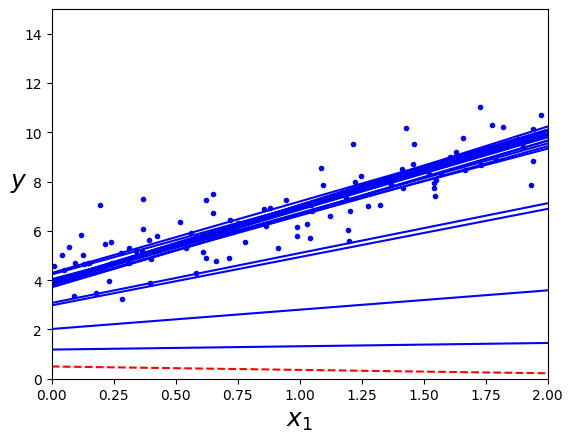

In [10]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:                    
            y_predict = X_new_b.dot(theta)           
            style = "b-" if i > 0 else "r--"         
            plt.plot(X_new, y_predict, style)        
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)                 

plt.plot(X, y, "b.")                                 
plt.xlabel("$x_1$", fontsize=18)                     
plt.ylabel("$y$", rotation=0, fontsize=18)           
plt.axis([0, 2, 0, 15])                                                              
plt.show()            

<p>By convention, we iterate by rounds of <em>m</em> iterations; each round by an <em>epoch</em>. While the batch GD code iterated 1,000 times through the whole training set, this code goes through the training set only 50 times, reaching the following solution:</p>

In [11]:
theta

array([[4.21076011],
       [2.74856079]])

<p>To perform Linear Regression using  Stochastic Gradient Descent with Scikit-Learn, we can use the SGDRegressor class, which defaults to optimise the MSE cost function. </p>

<p>The following will run for maximum 1,000 epochs (max_iter), or unless the loss drops by less than 10^(-5) during 100 epochs. It starts with a learning rate of 0.01 (eta0), using the default learning schedule.</p>

In [12]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty = None, eta0 = 0.1, random_state = 42)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None, random_state=42)

In [13]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.24365286]), array([2.8250878]))

<h3>4.3.3 Mini-batch Gradient Descent</h3>

<p>Mini-batch Gradient Descent is straightforward, once you know batch and stochastic gradient descent: at each step, instead of computing the gradients based on the full training set (as in batch GD) or based on just one instance (as in stochastic GD), we compute the gradients on small random sets of instances called <em>mini-batches</em>. The main advantage of mini-batch over stochastic is that you can get a performance boost from hardware optimisation of matrix operations, especially using GPUS. </p>

In [14]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [15]:
theta

array([[4.25214635],
       [2.7896408 ]])

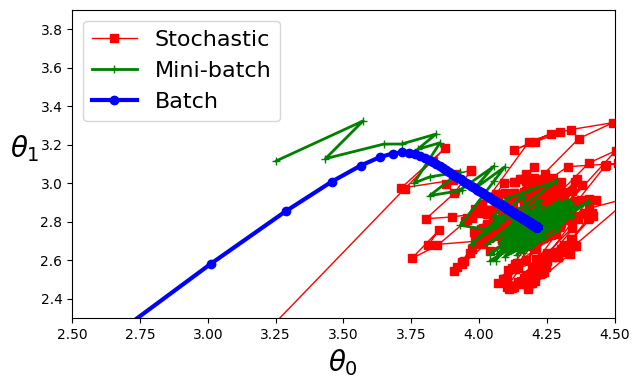

In [16]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
plt.show()

<h2>4.4 Polynomial Regression</h2>
<p>If your data is more complex than a straight line, you can still use a linear model to fit non-linear data. </p>

<p>A simple way to do this is to add powers of each feature as new features, then train a linear model on this extended set of features. This technique is called <em>polynomial regression</em>. </p>

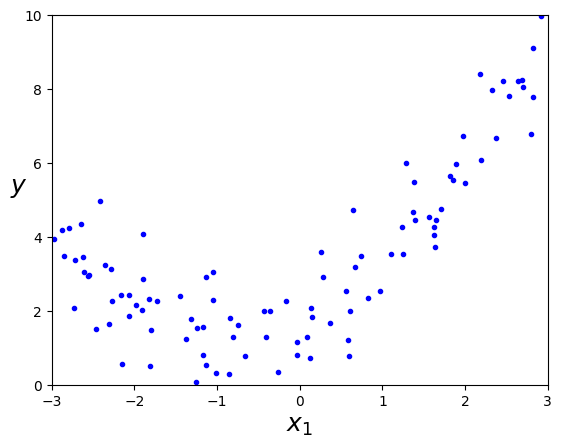

In [17]:
import numpy as np
import numpy.random as rnd

np.random.seed(42)

m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

<p>Clearly, a straight line will never fit this data properly. </p>

<p>We can use Scikit-Learn's PolynomialFeatures class to transform the training data, adding the square of each feature as a new feature. </p>

In [18]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.75275929])

<p>X_poly now contains the original feature of X plus the square of this feature. Now, we can fit a LinearRegression model to this extended training data:</p>

In [19]:
lin_reg  = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

<p>The model estimates y=0.56x^2+0.093x+1.78, while the original function was y=0.5x^2+x+2+Gaussian noise.</p>

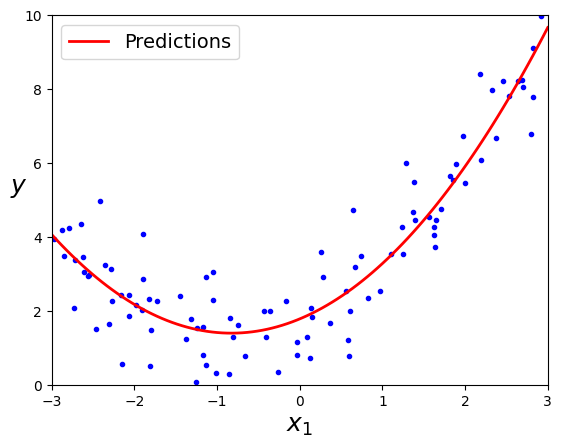

In [20]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

<p>When there are multiple features, polynomial regression is capable of finding relationships between features, which is something a plain linear regression model cannot do. </p>

<h2>4.5 Learning Curves</h2>
<p>If you perform high-degree polynomial regression, you will likely fit the training data much better than with plain linear regression. </p>

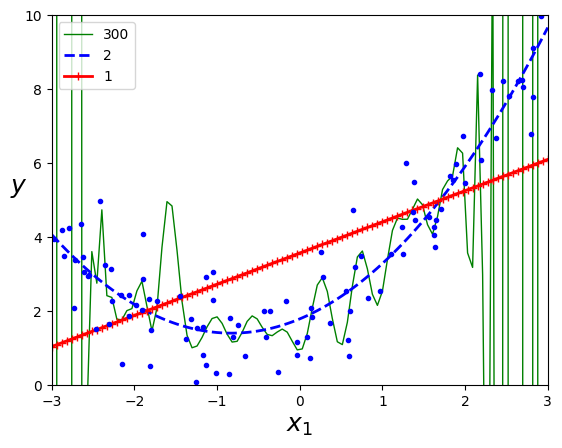

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

<p>For example, the above plot shows a 300-degree polynomial model being applied to the preceding training data, comparing the result with a pure linear model and a quadratic model. Notice how the 300-degree polynomial wiggles around to get as close to the training instances as possible. </p>

<p>This high-degree polynomial regression model is obviously severely overfitting the training data, while the linear model is underfitting it. The model that will generalise best in this case is the quadratic model. </p>

<p>But in general you won't know function generated the data, so how can you decide how complex your model should be? We had previously used cross-validation for classification. If a model performs well on the training data, but generalises poorly according to the cross-validation metrics, then the model is overfitting. It performs poorly on both, then it is underfitting. This is one way to tell if the model is too complex or simple. </p>

<p>Another way to tell is to look at the <em>learning curves</em>, which are plots of a model's training errors and validation error as a function of the training iteration: just evaluate the model at regular intervals during training on both the training set and the validation set, and plot the results. If the model can't be training incrementally, then you must train it several times on gradually larger subsets of the training set. </p>

<p>Scikit-Learn has a useful learning_curve() function to help with this. It trains and evaluates the model using cross-validation. By default, it retrains the model on growing subsets of the training set, but if the model supports incrementally learning you can set exploit_incrementally_learning=True when calling learning_curve() and it will train the model incrementally instead. </p>

<p>The function returns the training set sizes at which it evaluated the model, and the training and validation scores it measured for each size and for each cross-validation fold. </p>

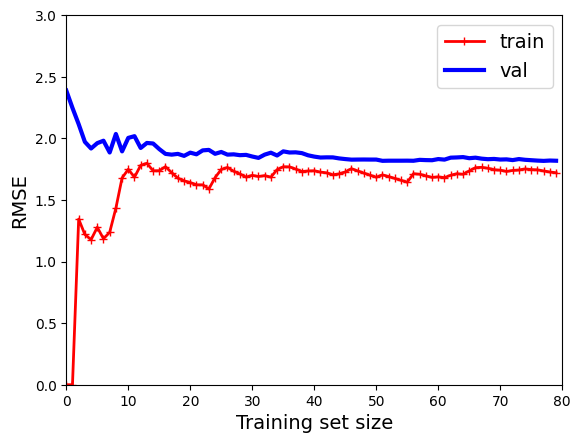

In [22]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train) + 1):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)  
    plt.xlabel("Training set size", fontsize=14)
    plt.ylabel("RMSE", fontsize=14)

lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])
plt.show()

<p>This model is underfitting. To see why, let's first look at the training error. </p>

<p>When there are just one or two instances in the training set, the model can fit them perfectly. But as new instances are added to the training set, it becomes impossible for the model to fit the training data perfectly, both because the data is noisy and because it is not linear at all. So the error on the training data goes up until it reaches a plateau, at which point adding new instances to the training set doesn't make the average error much better or worse. </p>

<p>Now let's look at the validation error. When the model is trained on very few training instances, it is incapable of generalising properly, which is why the validation error is initially quite large. Then, as the model is shown more training examples, it learns, and thus the validation error slowly goes down. However, once again a straight line cannot do a good job of modelling the data, so the error stands at a plateau, very close to the other curve. </p>

<p>These learning curves are typical of a model that is underfitting. Both curves have reached a plateau; they are close and fairly high. </p>

<p>Now let's look at the learning curves of a 10th-degree polynomial model on the same data:</p>

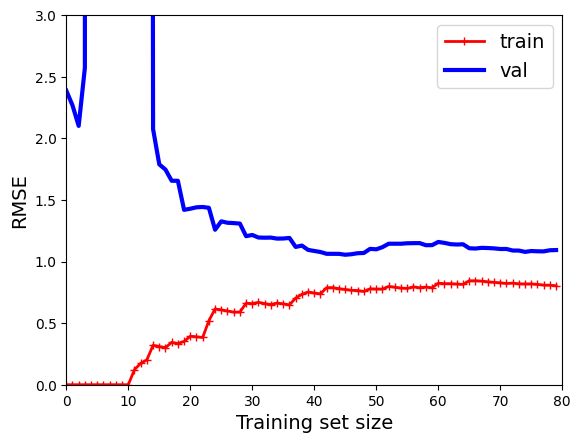

In [23]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])         
plt.show()      

<p>Here, the error is much lower than before. There is also a gap between the curves, meaning the model performs significantly better on the training data than on the validation data, which is the hallmark of an overfitting model. </p>

<p>If, however, we used a much large training set, then the curves would continue to get closer. </p>

<h2>4.6 Regularised Linear Models</h2>
<p>A good way to reduce overfitting is to regularise the model (i.e. to constrain it): the fewer degrees of freedom, the harder it will be to overfit the data. A simple way to regularise a polynomial model is to reduce the number of polynomial degrees. </p>

<p>For a linear model, regularisation is typically achieved by constraining the weights of the model. </p>

<h3>4.6.1 Ridge Regression</h3>
<p>This is a regularised version of linear regression, wherby a regression term is added to the MSE. The forces the learning algorithm to not only fit the data but also keep the model weights as small as possible. The regularisation term should only be added to the cost function during training, and the unregularised MSE used after training to evaluate the model performance. </p>

<p>Within the regularisation term, there is a paramter alpha, which controls how much we want to regularise the model. If this is zero, then ridge regression is just linear regression. If it is very large, then all weights end up very close to zero, and the result is a flat line going through the data's mean. </p>

In [24]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

In [25]:
ridge_reg = Ridge(alpha=1, solver="sag", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55072189]])

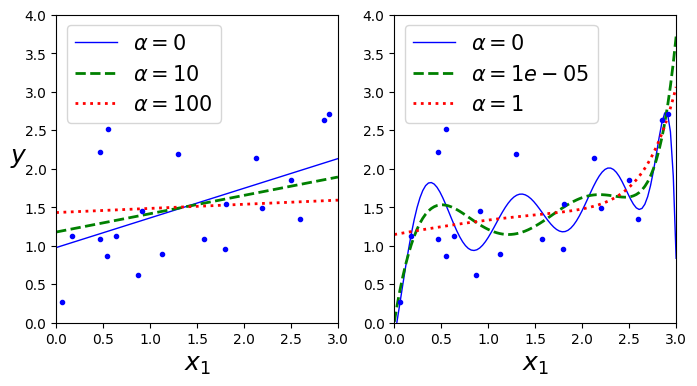

In [26]:
def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)

plt.show()

<p>The above plot shows several ridge models that were trained on some very noisy linear data using different alpha values. </p>

<p>On the left side, plain ridge models are used, leading to linear predictions. On the right, the data is first expanded using PolynomialFeatures(degree=10), then it is scaled using a StandardScaler, and finally the ridge models are applied to the resulting features: this is polynomial regression with ridge regularisation. </p>

<h3>4.6.2 Lasso Regression</h3>
<p><em>Least Absolute Shrinkage and Selection Operation Regression</em> or <em>Lasso Regression</em> is another regularised version of linear regression: just like ridge regression, it adds a regularisation term to the cost function, but it uses a different norm of the weight vector. </p>

C:\Users\Lee\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.803e+00, tolerance: 9.295e-04
  model = cd_fast.enet_coordinate_descent(


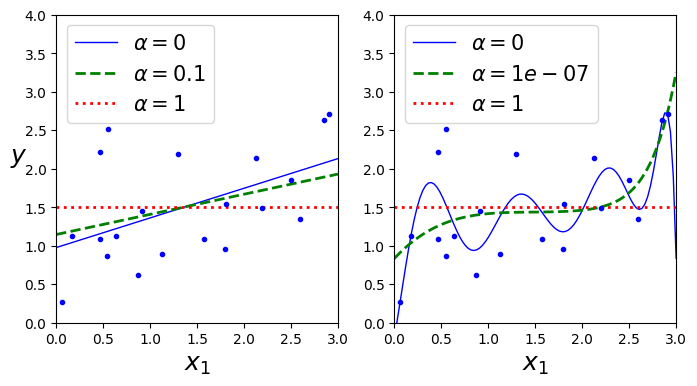

In [27]:
from sklearn.linear_model import Lasso

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), random_state=42)

plt.show()

<p>An important characteristic of lasso regression is that it tends to eliminate the weight of the least important features (i.e. set them to zero). For example, the blue line on the RHS looks roughly cubic: all the weights for the high-degree polynomial features are equal to zero. In other words, lasso regression automatically performs feature selection and outputs a <em>sparse model</em> with few nonzero weights. </p>

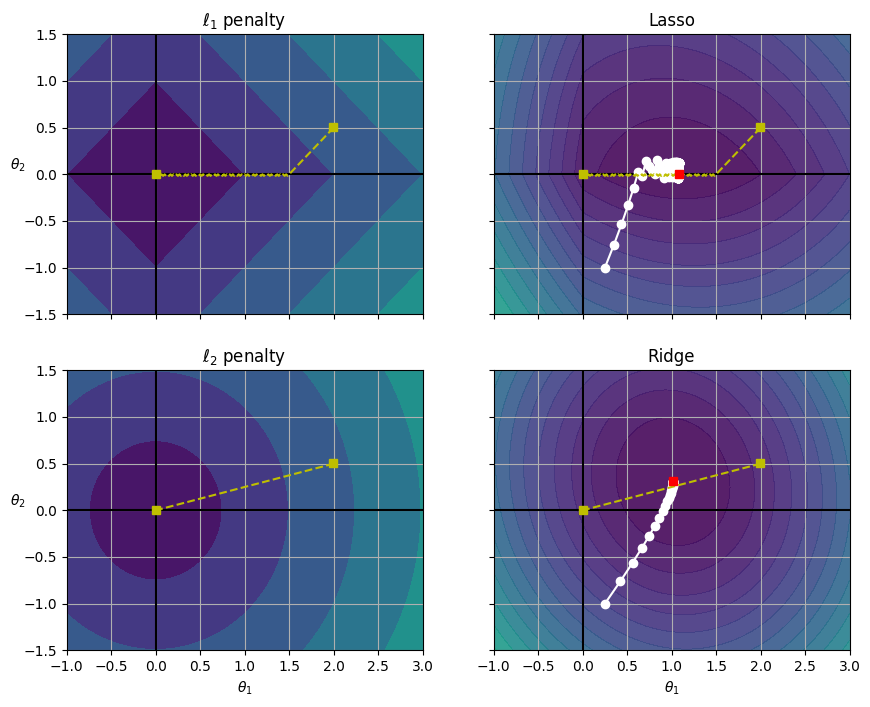

In [28]:
t1a, t1b, t2a, t2b = -1, 3, -1.5, 1.5

t1s = np.linspace(t1a, t1b, 500)
t2s = np.linspace(t2a, t2b, 500)
t1, t2 = np.meshgrid(t1s, t2s)
T = np.c_[t1.ravel(), t2.ravel()]
Xr = np.array([[1, 1], [1, -1], [1, 0.5]])
yr = 2 * Xr[:, :1] + 0.5 * Xr[:, 1:]

J = (1 / len(Xr) * ((T @ Xr.T - yr.T) ** 2).sum(axis=1)).reshape(t1.shape)

N1 = np.linalg.norm(T, ord=1, axis=1).reshape(t1.shape)
N2 = np.linalg.norm(T, ord=2, axis=1).reshape(t1.shape)

t_min_idx = np.unravel_index(J.argmin(), J.shape)
t1_min, t2_min = t1[t_min_idx], t2[t_min_idx]

t_init = np.array([[0.25], [-1]])

def bgd_path(theta, X, y, l1, l2, core=1, eta=0.05, n_iterations=200):
    path = [theta]
    for iteration in range(n_iterations):
        gradients = (core * 2 / len(X) * X.T @ (X @ theta - y)
                     + l1 * np.sign(theta) + l2 * theta)
        theta = theta - eta * gradients
        path.append(theta)
    return np.array(path)

fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(10.1, 8))

for i, N, l1, l2, title in ((0, N1, 2.0, 0, "Lasso"), (1, N2, 0, 2.0, "Ridge")):
    JR = J + l1 * N1 + l2 * 0.5 * N2 ** 2

    tr_min_idx = np.unravel_index(JR.argmin(), JR.shape)
    t1r_min, t2r_min = t1[tr_min_idx], t2[tr_min_idx]

    levels = np.exp(np.linspace(0, 1, 20)) - 1
    levelsJ = levels * (J.max() - J.min()) + J.min()
    levelsJR = levels * (JR.max() - JR.min()) + JR.min()
    levelsN = np.linspace(0, N.max(), 10)

    path_J = bgd_path(t_init, Xr, yr, l1=0, l2=0)
    path_JR = bgd_path(t_init, Xr, yr, l1, l2)
    path_N = bgd_path(theta=np.array([[2.0], [0.5]]), X=Xr, y=yr,
                      l1=np.sign(l1) / 3, l2=np.sign(l2), core=0)
    ax = axes[i, 0]
    ax.grid()
    ax.axhline(y=0, color="k")
    ax.axvline(x=0, color="k")
    ax.contourf(t1, t2, N / 2.0, levels=levelsN)
    ax.plot(path_N[:, 0], path_N[:, 1], "y--")
    ax.plot(0, 0, "ys")
    ax.plot(t1_min, t2_min, "ys")
    ax.set_title(fr"$\ell_{i + 1}$ penalty")
    ax.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        ax.set_xlabel(r"$\theta_1$")
    ax.set_ylabel(r"$\theta_2$", rotation=0)

    ax = axes[i, 1]
    ax.grid()
    ax.axhline(y=0, color="k")
    ax.axvline(x=0, color="k")
    ax.contourf(t1, t2, JR, levels=levelsJR, alpha=0.9)
    ax.plot(path_JR[:, 0], path_JR[:, 1], "w-o")
    ax.plot(path_N[:, 0], path_N[:, 1], "y--")
    ax.plot(0, 0, "ys")
    ax.plot(t1_min, t2_min, "ys")
    ax.plot(t1r_min, t2r_min, "rs")
    ax.set_title(title)
    ax.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        ax.set_xlabel(r"$\theta_1$")

plt.show()

We can get a sense of why this is the case by looking at the above plots. The axes represent two model parameters, and the background contours represent the $\ell_{1}$ loss, which drops linearly as you get closer to any axis. 

For example, if you set the $\theta_{1} = 2$ and $\theta_{2} = 0.5$, running Gradient Descent will decrement both parameters equally (as represented by the dashed yellow line); therefore $\theta_{2}$ will reach 0 first (since it was closer to 0 to begin with). After that, Gradient Descent will roll roll down the gutter until it reaches $\theta_{1} = 0$ (with a bit of bouncing around, since the gradients of $\ell_{1}$ never get close to 0: they are either -1 or 1 for each parameter).

In the top-right plot, the contours represent lasso regression's cost function (i.e. the an MSE cost function plus an $\ell_{1}$ loss). The small white circles show the paths that Gradient Descent takes to optimise some model parameters that were initialised around $\theta_{1} = 0.25$ and $\theta_{2}=-1$: notice once again how the path quickly reaches $\theta_{2}=0$, then rolls down the gutter and ends up bouncing around the global optimum (represented by the red square). 

If we increased $\alpha$, the global optimum would move left along the dashed yellow line, while if we decreased $\alpha$, the global optimum would move right (in this example, the optimal parameters for the unregularised MSE are $\theta_{1}=2$ and $\theta_{2}=0.5$).

The two bottom plots show the same thing but with an $\ell_{2}$ penalty instead. In the bottom-left plot, you can see that the $\ell_{2}$ loss decreases as we get closer to the origin, so Gradient Descent just takes a straight path towards that point. In the bottom-right plot, the contours represent Ridge Regression's cost function (i.e. an MSE cost function plus an $\ell_{2}$ loss). The gradients get smaller as the parameters approach the global optimum, so Gradient Descent naturally slows down. This limits the bouncing around, which helps ridge converge faster than lasso regression. Also, the optimal parameters (represented by the red square) get closer and closer to the origin when you increase $\alpha$, but they never get eliminated entirely.

Here is a small Scikit-Learn example using the Lasso class:

In [30]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha = 0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.53788174])

<h3>4.6.3 Elastic Net Regression</h3>

<em>Elastic Net Regression</em> is a middle ground between Ridge Regression and Lasso Regression.

When do we use a given regression type? It is almost always preferable to have at least a little bit of regularisation, so generally you should avoid plain linear regression. Ridge is a good default, but if you suspect that only a few features are useful, you should prefer lasso or elastic net because they tend to reduce the useless features' weights down to zero. In general, elastic net is preferred over lasso because lasso may behave erratically when the number of features is greater than the number of training instances or when several features are strongly correlated.

Here is a short example that uses Scikit-Learn's ElasticNet:

In [31]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha = 0.1, l1_ratio = 0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([1.54333232])

<h3>4.6.4 Early Stopping </h3>

A verry different way to regularise iterative learning algorithms such as gradient descent is to stop training as soon as the validation error reaches a minimum. This is known as <em>early stopping</em>. 

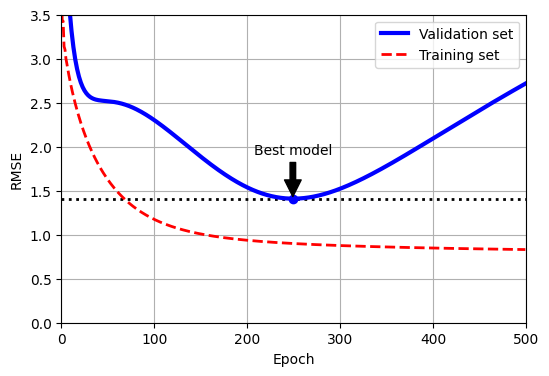

In [39]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from copy import deepcopy
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)
X_train, y_train = X[: m // 2], y[: m // 2, 0]
X_valid, y_valid = X[m // 2 :], y[m // 2 :, 0]

preprocessing = make_pipeline(PolynomialFeatures(degree=90, include_bias=False),
                              StandardScaler())
X_train_prep = preprocessing.fit_transform(X_train)
X_valid_prep = preprocessing.transform(X_valid)
sgd_reg = SGDRegressor(penalty=None, eta0=0.002, random_state=42)
n_epochs = 500
best_valid_rmse = float('inf')
train_errors, val_errors = [], []  

for epoch in range(n_epochs):
    sgd_reg.partial_fit(X_train_prep, y_train)
    y_valid_predict = sgd_reg.predict(X_valid_prep)
    val_error = mean_squared_error(y_valid, y_valid_predict, squared=False)
    if val_error < best_valid_rmse:
        best_valid_rmse = val_error
        best_model = deepcopy(sgd_reg)


    y_train_predict = sgd_reg.predict(X_train_prep)
    train_error = mean_squared_error(y_train, y_train_predict, squared=False)
    val_errors.append(val_error)
    train_errors.append(train_error)


best_epoch = np.argmin(val_errors)
plt.figure(figsize=(6, 4))
plt.annotate('Best model',
             xy=(best_epoch, best_valid_rmse),
             xytext=(best_epoch, best_valid_rmse + 0.5),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.plot([0, n_epochs], [best_valid_rmse, best_valid_rmse], "k:", linewidth=2)
plt.plot(val_errors, "b-", linewidth=3, label="Validation set")
plt.plot(best_epoch, best_valid_rmse, "bo")
plt.plot(train_errors, "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right")
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.axis([0, n_epochs, 0, 3.5])
plt.grid()

plt.show()

In the above plot, we see a complex model (in this case, a high-degree polynomial regression model) being trained with batch gradient descent on the quadratic dataset we used earlier. 

As the epochs go by, the algorithm learns, and its prediction error (RMSE) on the training set goes down, along with its prediction error on the validation set. After a while, the validation error stops decreasing and starts to go back up. This indicates that the model has started to overfit the training data. 

With early stopping you just stop training as soon as the validation error reaches the minimum. 

Here is a basic implementation of early stopping:

In [40]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)
X_train, y_train = X[: m // 2], y[: m // 2, 0]
X_valid, y_valid = X[m // 2 :], y[m // 2 :, 0]

preprocessing = make_pipeline(PolynomialFeatures(degree=90, include_bias=False), StandardScaler())
X_train_prep = preprocessing.fit_transform(X_train)
X_valid_prep = preprocessing.transform(X_valid)
sgd_reg = SGDRegressor(penalty=None, eta0=0.002, random_state=42)
n_epochs = 500
best_valid_rmse = float('inf')  

for epoch in range(n_epochs):
    sgd_reg.partial_fit(X_train_prep, y_train)
    y_valid_predict = sgd_reg.predict(X_valid_prep)
    val_error = mean_squared_error(y_valid, y_valid_predict, squared=False)
    if val_error < best_valid_rmse:
        best_valid_rmse = val_error
        best_model = deepcopy(sgd_reg)

This code first adds the polynomial features and scales all the input features, both for the training set and for the validation set (the code assumes you ahve split the original training set into a smaller training set and a validation set).

Then it creates an SGDRegressor model with no regularisation and a small learning rate. In the training loop, it calls partial_fit() instead of fit(), to perform incremental learning. At each epoch, it measures the RMSE on the validation set. If it is lower than the lwoest RMSE seen so far, it saves a copy of the model in the best_model variable.

This implementation doesn't actually stop training, but it lets you revert to the best model after training. 

<h2>4.7 Logistic Regression</h2>
<em>Logistic Regression</em> is commonly used to estimate the probability that an instance belongs to a particular class. If the model predicts that the instance belongs to that class (called the <em>positive class</em>, labeled "1"), and otherwise it predicts that it does not (i.e. it belongs to the <em>negative class</em>, labeld "0"). This makes it a binary classifier. 

Just like a linear regression model, a logistic regression model computes a weighted sum of the input features (plus a bias term), but instead of outputting the result directly like the linear regression model, it outputs the <em>logistic</em> of this result. 

The logistic regresion model estimated probability is given by:
$$
\hat{p} = h_{\theta} (x) = \sigma (\theta^{T}x)
$$

The logistic - noted $\sigma$ - is a <em>sigmoid function</em> (i.e. S-shaped) that outputs a number between 0 and 1. It is defined by:
$$
\sigma(t) = \frac{1}{1 + exp(-t)}
$$

Graphically:

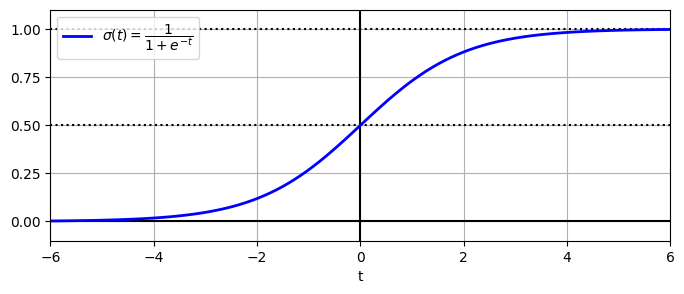

In [41]:
lim = 6
t = np.linspace(-lim, lim, 100)
sig = 1 / (1 + np.exp(-t))

plt.figure(figsize=(8, 3))
plt.plot([-lim, lim], [0, 0], "k-")
plt.plot([-lim, lim], [0.5, 0.5], "k:")
plt.plot([-lim, lim], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \dfrac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left")
plt.axis([-lim, lim, -0.1, 1.1])
plt.gca().set_yticks([0, 0.25, 0.5, 0.75, 1])
plt.grid()
plt.show()

Once the Logistic Regression model has estimated the probability $\hat{p} = h_{\theta} (x) = \sigma (\theta^{T}x)$ that an instance $x$ belongs to the positive class, it can make its prediction $\hat{y}$ easily, using:
$$
\hat{y} =
\begin{cases} 
      0 & \text{if } \hat{p} < 0.5 \\
      1 & \text{if } \hat{p} \geq 0.5 
\end{cases}
$$


<h2>4.8 Training and Cost Function</h2>

The objective of training is to set the paramater vector $\theta$ so that the model estimates high probabilities for positive instances (y=1) and low probabilities for negative instances (y=0). The idea is captured by the following cost function:
$$
c(\theta) = 
\begin{cases}
    -log(\hat{p}) & \text{if } y = 1 \\
    -log(1-\hat{p}) & \text{if } y = 0
\end{cases}
$$

This cost function makes sense because $-log(t)$ grows very large when t approaches 0, so the cost will be very large if the most estimates a probability close to 0 for a positive instance, and it will also be very large if the model estimates a probability close to 1 for a negative instance. On the other hand, log(t) is close to 0 when t is close to 1, so the cost will be close to 0 if the estimated probability is close to 0 for a negative instance or close to 1 for a positive instance, which is precisely what we want. 

The cost function over the whole trainign set is the average cost over all training instances. It can be written in a single expression called the <em>log loss</em>, shown by:
$$
J(\theta) = -\frac{1}{m} \sum^{m}_{i=1} [y^{(i)}log(\hat{p}^{(i)}) + (1 - y^{(i)})log(1-\hat{p}^{(i)})]
$$

The bad news is there is no known closed-form equation to compute the value of $\theta$ that minimises the cost function (there is no equivalent of the Normal Equation). The good news is the cost function ins convex, so Gradient Descent (or any other optimisation algorithm) is guaranteed to find the global minimum (if the learning rate is not too large and you wait long enough).

<h2>4.9 Decision Boundaries</h2>
We will use the Iris dataset to illustrate Logistic Regression. We will look to build a classifier to detect the <em>Iris virginica</em> type based only on the petal width feature. 

In [43]:
from sklearn.datasets import load_iris

iris = load_iris(as_frame = True)

iris.data.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [44]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = iris.data[["petal width (cm)"]].values
y = iris.target_names[iris.target] == 'virginica'

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

log_reg = LogisticRegression(random_state = 42)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

Let's look at the model's estimated probabilities for flowers with petal widths varying from 0cm to 3cm:

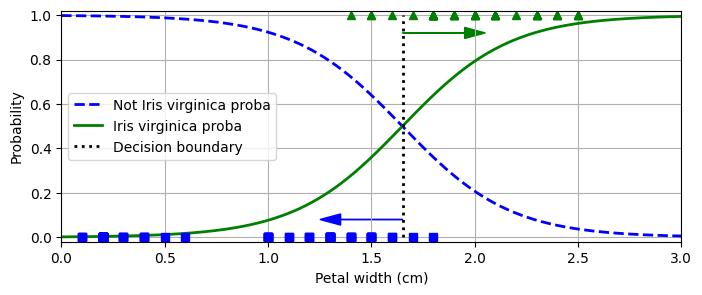

In [48]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0, 0]

plt.figure(figsize=(8, 3))  
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2,
         label="Not Iris virginica proba")
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica proba")
plt.plot([decision_boundary, decision_boundary], [0, 1], "k:", linewidth=2,
         label="Decision boundary")


plt.arrow(x=decision_boundary, y=0.08, dx=-0.3, dy=0,
          head_width=0.05, head_length=0.1, fc="b", ec="b")
plt.arrow(x=decision_boundary, y=0.92, dx=0.3, dy=0,
          head_width=0.05, head_length=0.1, fc="g", ec="g")
plt.plot(X_train[y_train == 0], y_train[y_train == 0], "bs")
plt.plot(X_train[y_train == 1], y_train[y_train == 1], "g^")
plt.xlabel("Petal width (cm)")
plt.ylabel("Probability")
plt.legend(loc="center left")
plt.axis([0, 3, -0.02, 1.02])
plt.grid()

plt.show()

The petal width of <em>Iris virginica</em> flowers (represented by triangles) ranges from 1.4cm to 2.5cm, while the other iris flowers (represented by squares) generally have a smaller petal width, ranging from 0.1cm to 0.8cm. 

Notice there is a bit of an overalp. Above about 2cm the classifier is highly confident that the flower is an <em>Iris virginica</em> (it outputs a high probability for that class), while below 1cm it is highly confident that it is not an <em>Iris virginica</em>. In between these extremes, the classifier is unsure. However, if you ask it to predict the class (using the predict() method), it will return whichever class is the most likely. Therefore, there is a <em>decision boundary</em> at around 1.6cm where both probabilities are equal to 50%: if the petal width is greater than 1.6cm the classifier will predict that the flower is an <em>Iris virginica</em>, and otherwise it will predict that it isn't (even if it's not very confident):

In [49]:
decision_boundary

np.float64(1.6516516516516517)

In [50]:
log_reg.predict([[1.7], [1.5]])

array([ True, False])

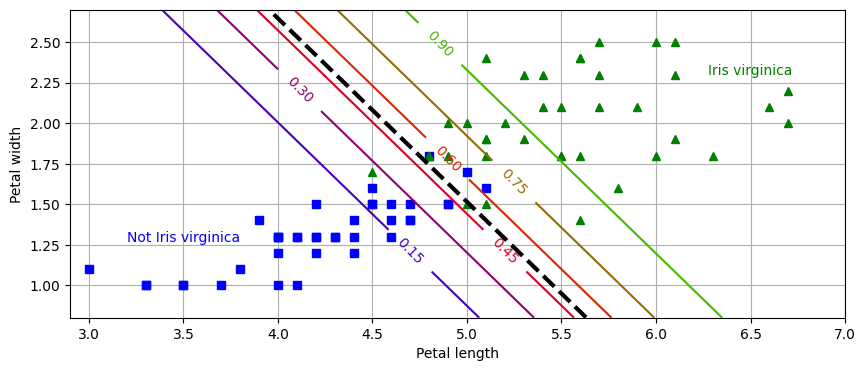

In [51]:
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris.target_names[iris.target] == 'virginica'
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

log_reg = LogisticRegression(C=2, random_state=42)
log_reg.fit(X_train, y_train)

# for the contour plot
x0, x1 = np.meshgrid(np.linspace(2.9, 7, 500).reshape(-1, 1),
                     np.linspace(0.8, 2.7, 200).reshape(-1, 1))
X_new = np.c_[x0.ravel(), x1.ravel()]  # one instance per point on the figure
y_proba = log_reg.predict_proba(X_new)
zz = y_proba[:, 1].reshape(x0.shape)

# for the decision boundary
left_right = np.array([2.9, 7])
boundary = -((log_reg.coef_[0, 0] * left_right + log_reg.intercept_[0])
             / log_reg.coef_[0, 1])

plt.figure(figsize=(10, 4))
plt.plot(X_train[y_train == 0, 0], X_train[y_train == 0, 1], "bs")
plt.plot(X_train[y_train == 1, 0], X_train[y_train == 1, 1], "g^")
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)
plt.clabel(contour, inline=1)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.27, "Not Iris virginica", color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", color="g", ha="center")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.axis([2.9, 7, 0.8, 2.7])
plt.grid()
plt.show()

The above plot shows the same dataset, but this time diplaying two features: petal width and length. Once trained, the logistic regression classifier can, based on these two features, estimate the probability that a new flower is an <em>Iris virginica</em>. The dashed line representst the points where the model estimates a 50% probability: this is the model's decision boundary. Note that this is a linear boundary. Each parallel line represents the point where the model outputs a specific probability. All the flowers beyond the top-rgiht line have over 90% chance of being <em>Iris virginica</em>, according to the model.

<h2>4.10 Softmax Regression</h2>
The logistic regression model can be generalised to support multiple classes directly, without having to train and combine multiple binary classifiers. This is called <em>softmax regression</em>, or <em>multinomial logistic regression</em>.

The idea is simple: when given an instance x, the softmax regression model first computes a score $s_{k}(x)$ for each class k, then estimates a probability of each class by applying the softmax function (also called the normalised exponential) to the scores. 

$$
s_{k}(x) = (\theta^{(k)})^{T} x
$$

Once you have computed the score of every class for the instance x, you can estimate the probability $\hat{p}_{k}$ that the instance belongs to the class k by running the scores through the softmax function. 

$$
\hat{p}_{k} = \sigma s_{k}(x) = \frac{exp(s_{k}(x))}{\sum^{N}_{j=1}exp(s_{k}(x))}
$$

Just like the logistic regression classifier, by default the softmax regression classifier predicts the class with the highest estimated probability (which is simply the class with the highest score), shown by:

$$
\hat{y} = argmax_{k} \space \sigma(s(x))_{k} = argmax_{k} \space s_{k}(x) = argmax_{k} \space ((\theta^{(k)})^{T})x
$$

Here, the argmax operator returns the value of a varaible that maximises a function. In this equation, it returns the value of k that maximises the estimated probability.

In [52]:
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

softmax_reg = LogisticRegression(C=30, random_state=42)
softmax_reg.fit(X_train, y_train)

LogisticRegression(C=30, random_state=42)

So, the next time you find an iris with petals that are 5cm long and 2cm, you can ask the model to tell what type of iris it is, and it will answer <em>Iris virginica</em> (class 2) with 96% probability:

In [53]:
softmax_reg.predict([[5, 2]])

array([2])

In [54]:
softmax_reg.predict_proba([[5, 2]])

array([[3.37167169e-08, 4.06723544e-02, 9.59327612e-01]])

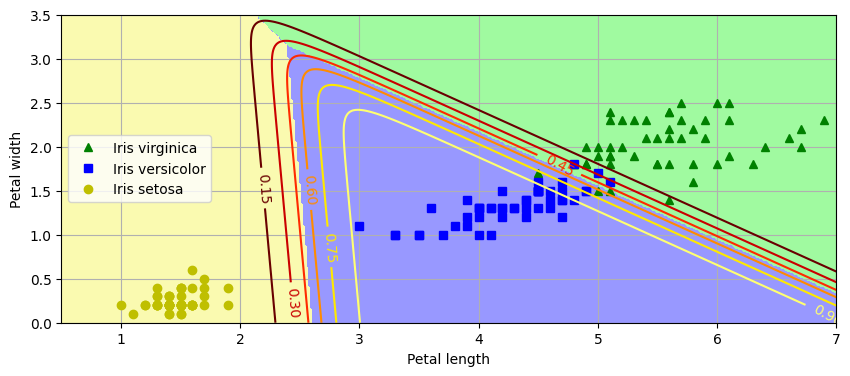

In [55]:
from matplotlib.colors import ListedColormap

custom_cmap = ListedColormap(["#fafab0", "#9898ff", "#a0faa0"])

x0, x1 = np.meshgrid(np.linspace(0, 8, 500).reshape(-1, 1),  np.linspace(0, 3.5, 200).reshape(-1, 1))
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y == 2, 0], X[y == 2, 1], "g^", label="Iris virginica")
plt.plot(X[y == 1, 0], X[y == 1, 1], "bs", label="Iris versicolor")
plt.plot(X[y == 0, 0], X[y == 0, 1], "yo", label="Iris setosa")

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap="hot")
plt.clabel(contour, inline=1)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="center left")
plt.axis([0.5, 7, 0, 3.5])
plt.grid()
plt.show()

In the above figure, we can see the resulting decision boundaries, represented by the background colours. Notice tyhat the decision boundaries between any two classes are linear. 

The figure also shows the probabilities for the <em>Iris versicolor</em> class, represented by the curved lines (e.g. the line labeled with 0.30 represents the 30% probability boundary). 

Notice that the model can predict a class that has an estimated probability below 50%. For example, at the point where all decision boundarties meet, all classes have an equal estimated probability of 33%.